<a href="https://colab.research.google.com/github/mbl-cin/Sistemas_inteligentes/blob/main/KMeans_sem_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from numpy.random import uniform
import seaborn as sns
import random

In [ ]:
from ucimlrepo import fetch_ucirepo

# Dando fetch no dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# Pegando os dados e escolhendo as colunas
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features[['Height', 'Weight']]

print(X)

        Height      Weight
0     1.620000   64.000000
1     1.520000   56.000000
2     1.800000   77.000000
3     1.800000   87.000000
4     1.780000   89.800000
...        ...         ...
2106  1.710730  131.408528
2107  1.748584  133.742943
2108  1.752206  133.689352
2109  1.739450  133.346641
2110  1.738836  133.472641

[2111 rows x 2 columns]


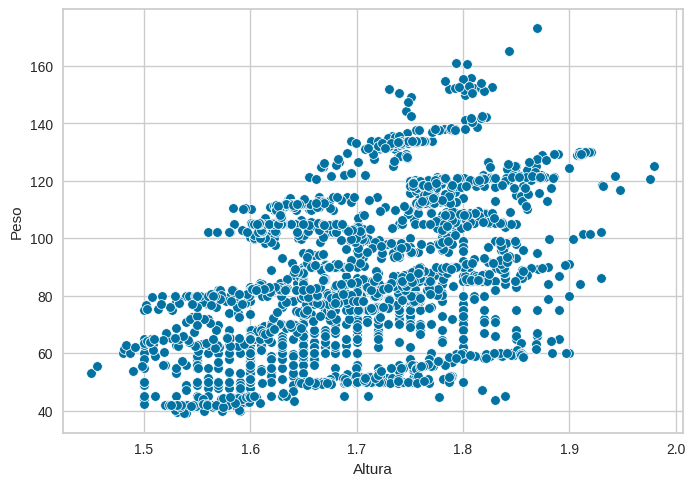

In [ ]:
# Plotando os dados apenas para visualizar a distribuição
sns.scatterplot(data=X, x='Height', y='Weight')
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.show()

In [ ]:
# Função para calcular a distância euclidiana entre um ponto e um conjunto de dados
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [ ]:
# Classe KMeans
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X_train):
        # Inicialização dos centróides utilizando o método KMeans++
        self.centroids = [random.choice(X_train) for _ in range(self.n_clusters)]

        # Iteração até convergência ou até atingir o número máximo de iterações
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Atribuição dos pontos aos centróides mais próximos
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            # Atualização dos centróides
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

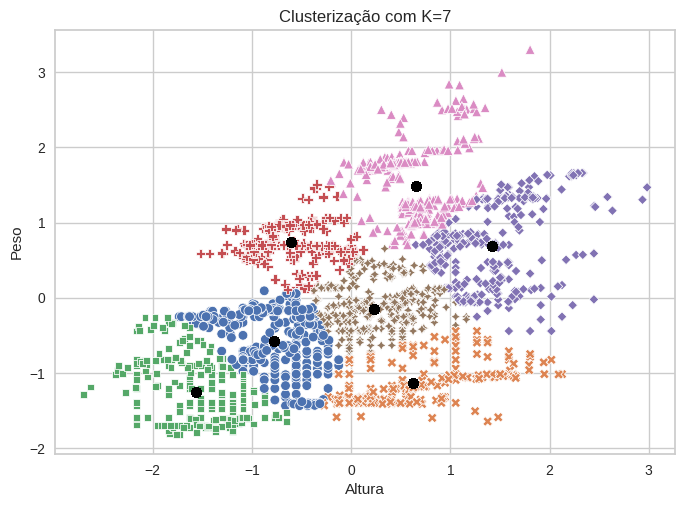

In [ ]:
# Definindo o número original de centróides e normalizando os dados
centers = 7
X_train = StandardScaler().fit_transform(X)

# Colocando os centróides
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)

# Plotando o resultado
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=classification,
                style=classification,
                palette="deep",
                legend=False
                )
plt.scatter([center[0] for center in class_centers], [center[1] for center in class_centers], s=50, c='black')
plt.title(f'Clusterização com K=7')
plt.xlabel("Altura")
plt.ylabel("Peso")
plt.show()

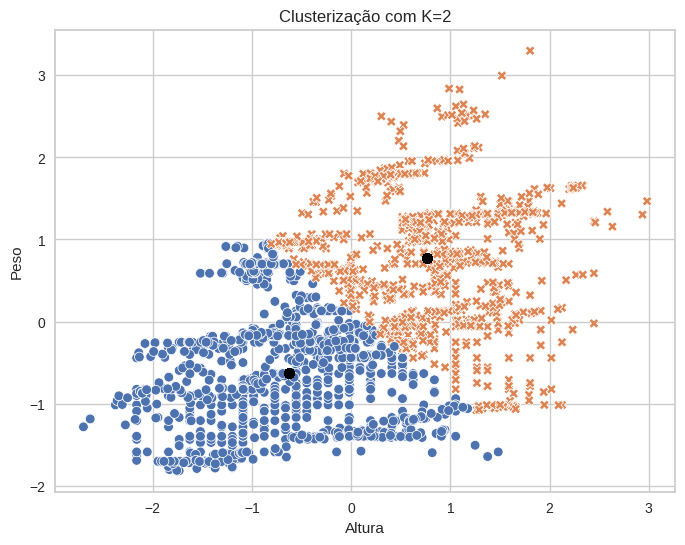

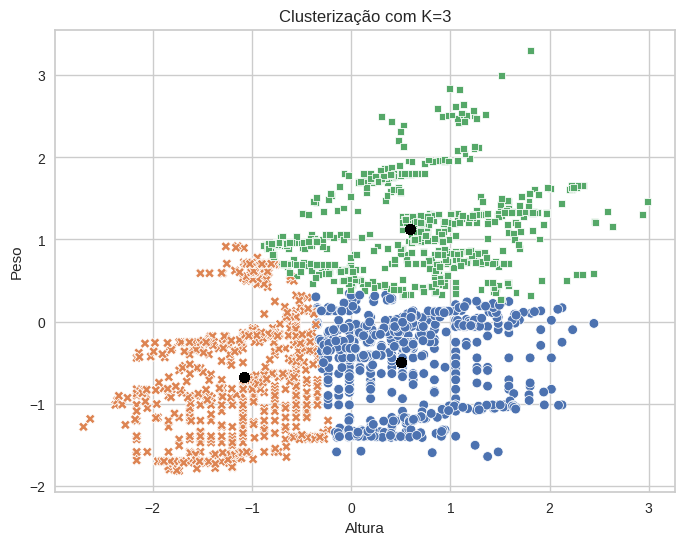

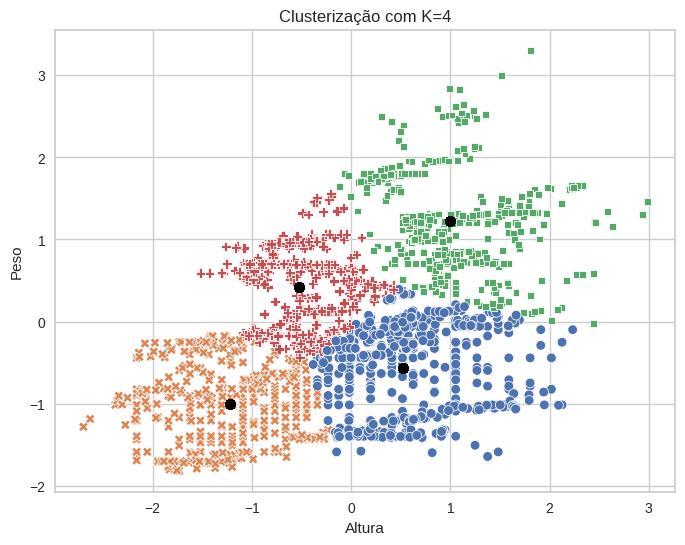

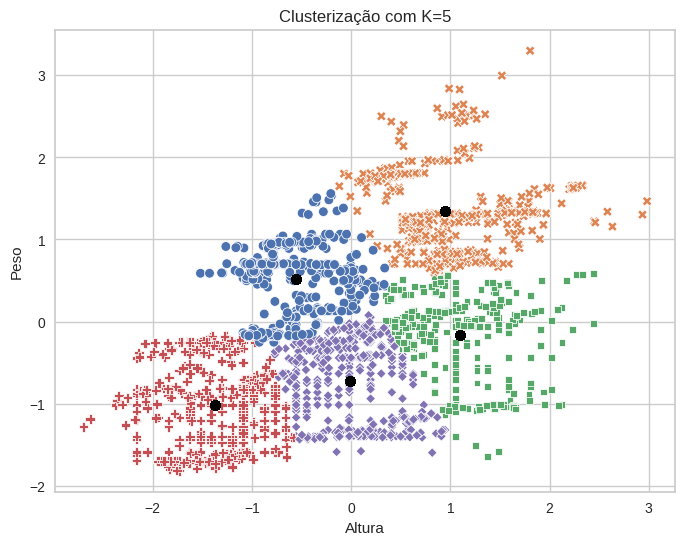

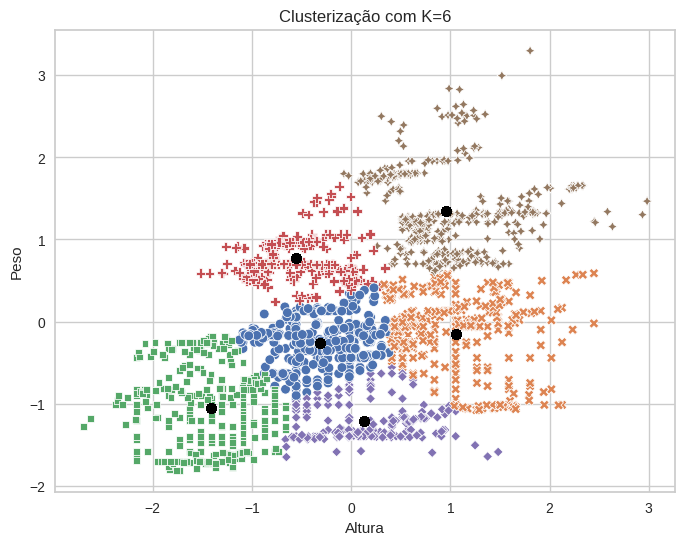

In [ ]:
# Rodando o KMeans para valores de K de 2 a 6
for k in range(2, 7):
    # Instanciando e ajustando o modelo KMeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)

    # Avaliação do modelo
    class_centers, classification = kmeans.evaluate(X_train)

    # Plotando os resultados
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=[X[0] for X in X_train],
                    y=[X[1] for X in X_train],
                    hue=classification,
                    style=classification,
                    palette="deep",
                    legend=False
                    )
    plt.scatter([center[0] for center in class_centers], [center[1] for center in class_centers], s=50, c='black')
    plt.title(f'Clusterização com K={k}')
    plt.xlabel("Altura")
    plt.ylabel("Peso")
    plt.show()